In [61]:
import pandas as pd
import os

In [62]:
df = pd.read_csv('data/combined_pose_data.csv')
df.head()

,class_name,metadata,x1,y1,z1,v1,x2,y2,z2,v2,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,ayesha,"spin, true_grip",0.550901532173157,0.452469408512116,-0.371652334928513,0.999634027481079,0.551996767520905,0.459261238574982,-0.373692780733109,0.999179065227509,...,-0.110185354948044,0.97651344537735,0.501697540283203,0.326334536075592,0.484908133745194,0.711136996746063,0.431104391813278,0.247272819280624,-0.227218180894852,0.988907516002655
1,ayesha,"spin, true_grip",0.550313651561737,0.456584453582764,-0.408107221126556,0.999585211277008,0.551725804805756,0.462751150131226,-0.418755561113358,0.99914014339447,...,0.205016225576401,0.97779905796051,0.496018379926682,0.349914938211441,0.744754374027252,0.718097865581513,0.450083166360855,0.246959403157234,0.100605793297291,0.989433228969574
2,ayesha,"spin, true_grip",0.550200760364533,0.460396617650986,-0.407223522663116,0.999601304531097,0.551819682121277,0.466391950845718,-0.416219681501389,0.999173760414124,...,0.364735126495361,0.978426575660706,0.470389485359192,0.366217911243439,0.815191566944122,0.715532183647156,0.466189026832581,0.248627513647079,0.263333767652512,0.989323079586029
3,ayesha,"spin, true_grip",0.554080247879028,0.459564983844757,-0.400975495576859,0.999601781368256,0.554280340671539,0.465722143650055,-0.408863842487335,0.999175667762756,...,0.200570553541183,0.977982401847839,0.475203692913055,0.354495465755463,0.705523192882538,0.724246919155121,0.511983454227448,0.253052622079849,0.0986333563923836,0.988872647285461
4,ayesha,"spin, true_grip",0.55398041009903,0.459447383880615,-0.382720917463303,0.999635696411133,0.555034399032593,0.465176969766617,-0.380493581295013,0.999244153499603,...,-0.0212578978389502,0.978842318058014,0.418205291032791,0.371975719928741,0.567162215709686,0.737097322940826,0.53110146522522,0.253462135791779,-0.137917727231979,0.98934006690979


In [63]:
df.shape
df['class_name'].unique()

array(['ayesha', 'cupid', 'outside_leg_hang', 'class_name',
       'inside_leg_hang'], dtype=object)

In [64]:
df = df[df['class_name'] != 'class_name']

In [67]:
df['class_name'].unique()

array(['ayesha', 'cupid', 'outside_leg_hang', 'inside_leg_hang'],
      dtype=object)

In [68]:
# check class distribution for imbalances

class_distribution = df['class_name'].value_counts()
print("class distribution")
print(class_distribution)

class distribution
class_name
cupid               1255
outside_leg_hang    1163
inside_leg_hang      949
ayesha               468
Name: count, dtype: int64


## Decision Tree Model

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop(['class_name', 'metadata'], axis=1)  
y = df['class_name']  

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [271]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics

In [272]:
# Check dimensions match
print(f'The shape of X_train is: {X_train.shape} and the shape of y_train is {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape} and the shape of y_test is {y_test.shape}')

The shape of X_train is: (2684, 132) and the shape of y_train is (2684,)
The shape of X_test is: (1151, 132) and the shape of y_test is (1151,)


In [273]:
pose_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
pose_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [274]:
pose_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [275]:
#predict
pre_tree = pose_tree.predict(X_test)
print(pre_tree[0:5])
print(y_test[0:5])

['outside_leg_hang' 'cupid' 'outside_leg_hang' 'outside_leg_hang' 'ayesha']
2017    outside_leg_hang
953                cupid
2763    outside_leg_hang
2952     inside_leg_hang
363               ayesha
Name: class_name, dtype: object


In [276]:
#Evaluate
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_accuracy = metrics.accuracy_score(y_test, pre_tree)
print(f"DecisionTrees's Accuracy: {dt_accuracy}")

DecisionTrees's Accuracy: 0.9087749782797567


In [170]:
X_test.head(1)

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
2017,0.359675318002701,0.688916146755219,-0.0964192673563957,0.999997317790985,0.364024460315704,0.701417505741119,-0.0835321322083473,0.999997019767761,0.364459931850433,0.701901137828827,...,0.143464177846909,0.948816895484924,0.649429202079773,0.465142786502838,0.0890685245394707,0.990957856178284,0.496022343635559,0.312365859746933,0.206806629896164,0.935376763343811


In [171]:
# pose_tree.predict(X_test)[200]

In [172]:
import cv2
from matplotlib import pyplot as plt

# Load  image
image_path = 'data/images/insidelh.jpeg'
image = cv2.imread(image_path)


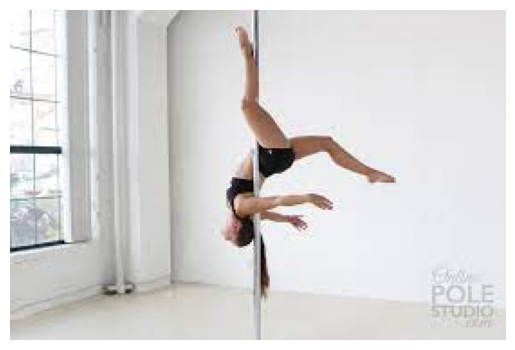

In [173]:

# Display 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

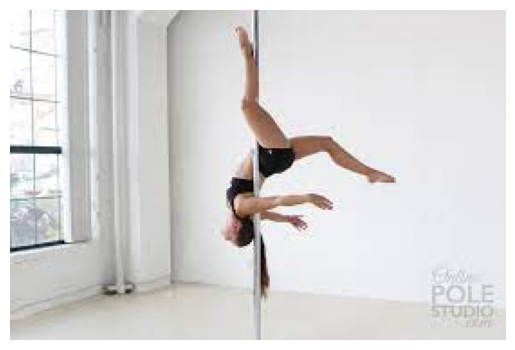

In [174]:
def display_image(image_path):
    # Check image  loaded successfully
    if image_path is not None:
        # Display the image in the Jupyter Notebook
        image = cv2.imread(image_path)
        # Display the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')  
        plt.show()
    else:
        print("Failed to load image.")
        
display_image('data/images/insidelh.jpeg')

In [175]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic 

In [176]:
def load_image(image_path):
    """loads an image"""
    # Check if the image was loaded successfully
    if image_path is not None:
        # Display the image in the Jupyter Notebook
        image = cv2.imread(image_path)
        return image
    else:
        print("Failed to load image.")
        
cupid_img = load_image('data/images/cp2.jpeg')
cupid_img
    

array([[[ 71,  76,  79],
        [ 67,  72,  75],
        [ 63,  68,  71],
        ...,
        [  0,   0,   3],
        [  0,   0,   3],
        [  0,   0,   3]],

       [[ 66,  71,  74],
        [ 64,  69,  72],
        [ 62,  67,  70],
        ...,
        [  0,   0,   3],
        [  0,   0,   3],
        [  0,   0,   4]],

       [[ 66,  71,  74],
        [ 65,  70,  73],
        [ 65,  70,  73],
        ...,
        [ 29,  32,  36],
        [ 29,  32,  36],
        [ 30,  33,  37]],

       ...,

       [[174, 179, 180],
        [174, 179, 180],
        [175, 180, 181],
        ...,
        [104, 109, 112],
        [103, 108, 111],
        [102, 107, 110]],

       [[173, 178, 179],
        [173, 178, 179],
        [174, 179, 180],
        ...,
        [100, 105, 108],
        [ 99, 104, 107],
        [ 99, 104, 107]],

       [[173, 178, 179],
        [173, 178, 179],
        [174, 179, 180],
        ...,
        [100, 105, 108],
        [ 99, 104, 107],
        [ 99, 104, 107]]

In [177]:
import cv2
import math
import numpy as np
from IPython.display import display, Image

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
    h, w = image.shape[:2]  # access height and width using shape 
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    display(Image(data=cv2.imencode('.png', img)[1].tobytes()))

Pose landmarks:


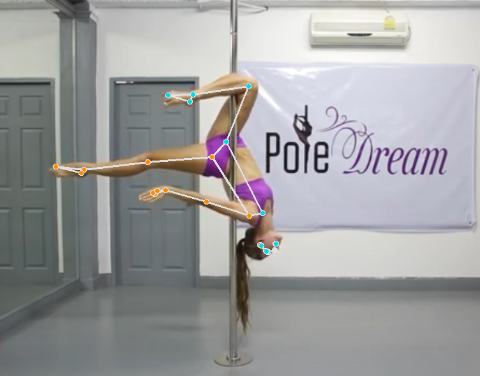

In [178]:
def process_and_display_landmarks(image):
    """takes and image, runs pose estimation
    then displays image with annotations"""
    with mp_holistic.Holistic(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
        
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # image_height, image_width = image.shape

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
            
        # Draw pose landmarks.
        print(f'Pose landmarks:')
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        resize_and_show(annotated_image)
        
        
img = load_image('data/images/olh_scsh.jpeg')
process_and_display_landmarks(img)

In [179]:
def process_and_return_landmarks(image):
    """takes and image, runs pose estimation
    then retuns an array of joint positions"""
    with mp_holistic.Holistic(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
        
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if results.pose_landmarks:
            landmarks_array = np.array([(landmark.x, landmark.y, landmark.z, landmark.visibility)
                                        for landmark in results.pose_landmarks.landmark]).reshape(1, -1)
            
            # print(landmarks_array)
            return landmarks_array
        
        else:
            print("No landmarks")
            return None
    
new_row = process_and_return_landmarks(cupid_img)
new_row.shape

                

(1, 132)

In [180]:
pose_tree.predict(new_row)

/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['ayesha'], dtype=object)

In [250]:
def get_prediction(img, predict):
    """consumes and image and a model predictor 
    and returns a prediction"""
    landmarks = process_and_return_landmarks(img)
    return predict(landmarks)[0]


predict = pose_tree.predict # replace this with thatever model you makes "predict" method
get_prediction(cupid_img, predict)

/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'ayesha'

In [281]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit the Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Now you can use the predict method
predict = gradient_boosting_model.predict

# Example usage
get_prediction(cupid_img, predict)



/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'outside_leg_hang'

: 

In [280]:
y_pred = gradient_boosting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [30]:
import cv2
import numpy as np

def generate_gaussian_pyramid(image, levels):
    pyramid = [image]
    for _ in range(levels - 1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# Read image 
image = cv2.imread('data/images/ayesha1.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# number of pyramid levels
num_levels = 4

# Generate Gaussian pyramid
gaussian_pyramid = generate_gaussian_pyramid(gray_image, num_levels)

# Display original image and the G pyramid
cv2.imshow('Original Image', gray_image)
for i in range(num_levels):
    cv2.imshow(f'Level {i}', gaussian_pyramid[i])


cv2.waitKey(0)
cv2.destroyAllWindows()


In [46]:
small_img = generate_gaussian_pyramid(image, 5)
plt.imshow(cv2.cvtColor(small_img[-1], cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

NameError: name 'generate_gaussian_pyramid' is not defined

In [47]:
get_prediction(small_img[-1], predict)

NameError: name 'small_img' is not defined

Pose landmarks:


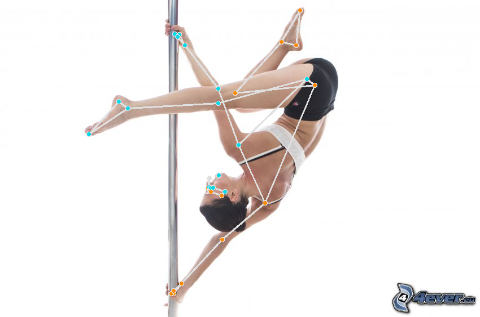

Pose landmarks:


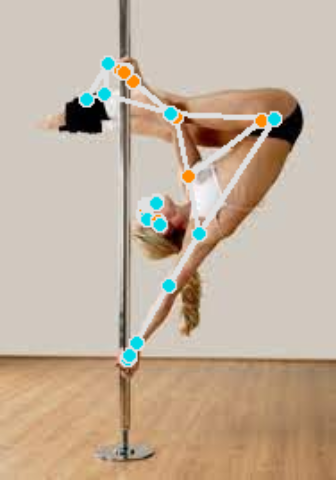

Pose landmarks:


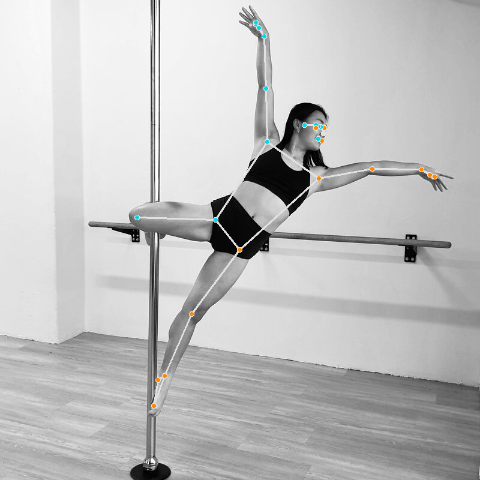

In [197]:
# try running on a couple images displaying
image_list = [load_image('data/images/pole-dance-241168.jpeg'), load_image('data/images/ayesha6.jpeg'), load_image('data/images/cp5.jpeg')]
image_landmarks = []

for i in image_list:
    process_and_display_landmarks(i)
    data = process_and_return_landmarks(i)
    image_landmarks.append(data)
    
landmark_array = np.array(image_landmarks)

In [198]:
# Run a predict on the result from process_and_return(img) printing the result

# print(landmark_array.shape)
predict = pose_tree.predict

for i in image_list:
    print(get_prediction(i, predict))
    



/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ayesha


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ayesha
cupid


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
def get_frame_color_space(frame):
    if frame is not None:
        if frame.shape[2] == 3:
            return "BGR"  
        elif frame.shape[2] == 4:
            return "RGBA"  
    return "Unknown"


In [56]:
# running on a video, displaying points
def video_process_and_display_landmarks(video_path):
    
    cap = cv2.VideoCapture(video_path)
    
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolour 
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False  
            results = holistic.process(image)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
            
                         # Add rectangle
            rectangle_color = (0, 255, 0)  # Green rectangle
            rectangle_position = (10, image.shape[0] - 70)  # Bottom left corner
            rectangle_size = (300, 60)  # Rectangle size (width, height)
            cv2.rectangle(image, rectangle_position, (rectangle_position[0] + rectangle_size[0], rectangle_position[1] - rectangle_size[1]), rectangle_color, -1)

            # Add class text
            class_text = "[Insert Predicted Pose]"  
            text_position = (rectangle_position[0] + 15, rectangle_position[1] - 20)  
            text_color = (0, 0, 0)  
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1.0
            cv2.putText(image, class_text, text_position, font, font_scale, text_color, 1, cv2.LINE_AA)

                        
            cv2.imshow('Video', image)
        
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [196]:
video_path = "data/ayesha.MOV"
video_process_and_display_landmarks(video_path)

error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [199]:

# try running on a video, displaying predicted type
def video_process_and_predict_pose(video_path, model):
    
    cap = cv2.VideoCapture(video_path)
    
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolour Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False  
            results = holistic.process(image)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Pose detection
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
            
            # Export 
            try:
            #Extract 
                pose = results.pose_landmarks.landmark
                # row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
                
                    # Make Detections
                # X = pd.DataFrame([row])
                pose_class = get_prediction(image, predict)
                #pose_prob = model.predict_proba(X)[0]
                #print(pose_class, pose_prob)
                
            except:
                pass
            
            
            # Add rectangle 
            rectangle_color = (0, 255, 0)  # Green 
            rectangle_position = (10, image.shape[0] - 70)  # Bottom left 
            rectangle_size = (300, 60)  # Rectangle (width, height)
            cv2.rectangle(image, rectangle_position, (rectangle_position[0] + rectangle_size[0], rectangle_position[1] - rectangle_size[1]), rectangle_color, -1)

            # Add class text
            class_text = pose_class  
            text_position = (rectangle_position[0] + 15, rectangle_position[1] - 20)  
            text_color = (0, 0, 0)  # White text
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1.0
            cv2.putText(image, class_text, text_position, font, font_scale, text_color, 1, cv2.LINE_AA)

                        
            cv2.imshow('Video', image)
        
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()




In [200]:
video_process_and_predict_pose(video_path, predict)


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

No landmarks


/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [37]:
# Figure out how to show video and the current frame of video as it runs

#frame counter 




: 

In [253]:
folder_path = 'data/images'
files = os.listdir(folder_path)
# filename = files[0]

# image_path = os.path.join(folder_path, filename)
# print(image_path)
predict = gradient_boosting_model.predict
#prediction_result = get_prediction(load_image(image_path), predict)

for file_name in files:
    
    try:
        image_path = os.path.join(folder_path, file_name)

        prediction_result = get_prediction(load_image(image_path), predict)
         
        print(f"Filename: {file_name}, Prediction: {prediction_result}")
    except:
        print(f"{file_name=} is not compatible")


Filename: ayesha1.jpeg, Prediction: 0
file_name='.DS_Store' is fucked
Filename: ilh4.jpeg, Prediction: 3
Filename: cp5.jpeg, Prediction: 1
Filename: olh_scsh.jpeg, Prediction: 3
Filename: insidelh.jpeg, Prediction: 2
Filename: ilh3.jpeg, Prediction: 0
Filename: ilh.jpeg, Prediction: 2
Filename: Ayesha2.webp, Prediction: 0
Filename: cp2.jpeg, Prediction: 3
Filename: ayeshatwistedgrip.jpeg, Prediction: 0
Filename: tgayesha.jpeg, Prediction: 0
Filename: ayesha6.jpeg, Prediction: 0
Filename: pole-dance-241168.jpeg, Prediction: 0
Filename: ilh1.jpeg, Prediction: 2
Filename: aye.png, Prediction: 0
Filename: cp1.jpeg, Prediction: 1
Filename: ayeshaelbowgrip.jpeg, Prediction: 0
Filename: ilh6.jpeg, Prediction: 3
Filename: outsideleg.jpeg, Prediction: 2
Filename: islh2.jpeg, Prediction: 2
Filename: ayesha.jpeg, Prediction: 0
Filename: ayesha_.jpeg, Prediction: 0


More Models

<function matplotlib.pyplot.show(close=None, block=None)>

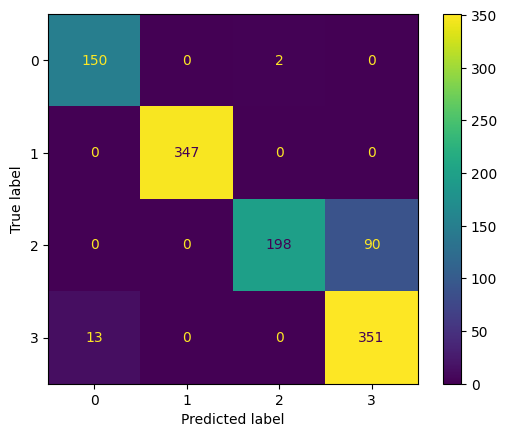

In [208]:
cm = confusion_matrix(y_test, pre_tree, labels=pose_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show

In [209]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_accuracy = metrics.accuracy_score(y_test, pre_tree)
print(f"DecisionTrees's Accuracy: {dt_accuracy}")

DecisionTrees's Accuracy: 0.9087749782797567


In [219]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [216]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import seaborn as sns


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# CNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=132))  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  #  4 pose classes

# Compile 
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Convert int labels to one-hot encoded
y_train_categorical = pd.get_dummies(y_train).values
y_test_categorical = pd.get_dummies(y_test).values

# Convert input features to numpy array
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# plot
history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# train
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))


Epoch 1/10
96/96 [==============================] - 2s 7ms/step - loss: 1.0260 - accuracy: 0.5567 - val_loss: 0.6206 - val_accuracy: 0.7119
Epoch 2/10
96/96 [==============================] - 0s 5ms/step - loss: 0.6058 - accuracy: 0.7249 - val_loss: 0.4536 - val_accuracy: 0.8292
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.7920 - val_loss: 0.3609 - val_accuracy: 0.8344
Epoch 4/10
96/96 [==============================] - 1s 8ms/step - loss: 0.4053 - accuracy: 0.8194 - val_loss: 0.3017 - val_accuracy: 0.8814
Epoch 5/10
96/96 [==============================] - 1s 5ms/step - loss: 0.3586 - accuracy: 0.8458 - val_loss: 0.2414 - val_accuracy: 0.9231
Epoch 6/10
96/96 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8716 - val_loss: 0.2063 - val_accuracy: 0.9205
Epoch 7/10
96/96 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.8941 - val_loss: 0.1837 - val_accuracy: 0.9374
Epoch 8/10
96/96 [==

In [247]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)


print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

24/24 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9726
Test Accuracy: 97.26%


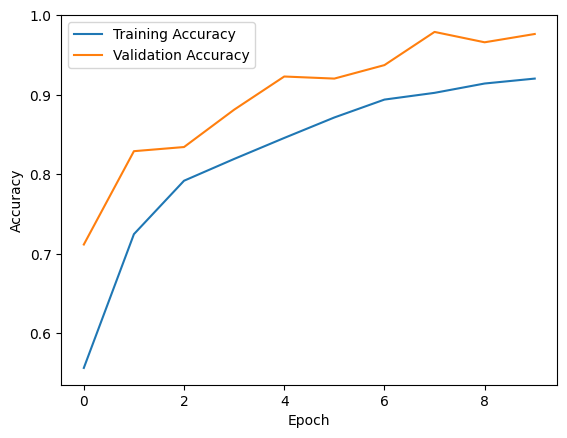

In [248]:
#training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

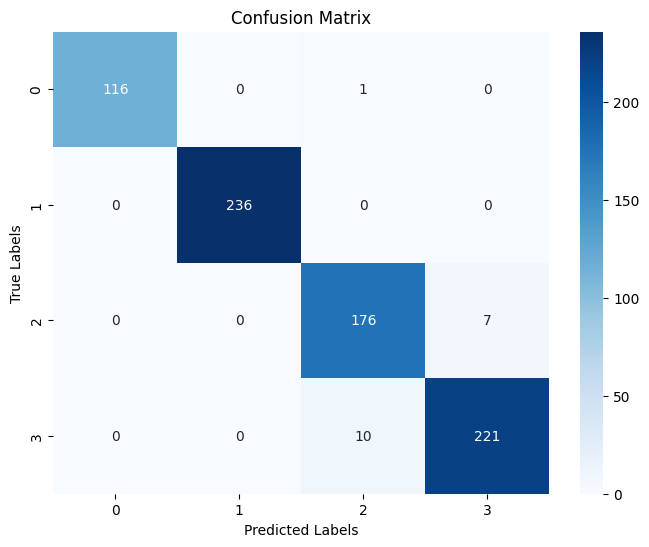

In [249]:
# encoded labels back to integers for the confusion matrix
y_test_classes = np.argmax(y_test_categorical, axis=1)

conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the CM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [267]:
test_img = 'data/images/cp5.jpeg'
test_row = process_and_get_landmarks(test_img)

predicting = gradient_boosting_model.predict
prediction_result = get_prediction(load_image(test_img), predicting)

print(prediction_result)



1


In [268]:
test_img = 'data/images/cp5.jpeg'
test_row = process_and_get_landmarks(test_img)

prediction = model.fit(new_row)


print(prediction)

ValueError: in user code:

    File "/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/keras/src/engine/training.py", line 1128, in train_step
        self._validate_target_and_loss(y, loss)
    File "/Users/emmacorkery/opt/anaconda3/envs/HPE/lib/python3.11/site-packages/keras/src/engine/training.py", line 1082, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=categorical_crossentropy, and therefore expects target data to be provided in `fit()`.
